### 3.6 手書き数字認識

In [2]:
import sys, os
print(os.getcwd()) # ここの親ディレクトリは"DeepLearning"であることがわかった

sys.path.append('../source_code') # `os.pardir`だけじゃなくて, `'../'`でも親ディレクトリを表せる
# 以上のコードで，importする際にファイルを検索するディレクトリ一覧に'source_code'を追加できた．
# これめちゃくちゃ大事

from dataset.mnist import load_mnist # load mnist関数の読み込み

c:\Users\hr102\documents\python\deeplearning\3_neural_network


In [3]:
# load_mnist関数を実行
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False) # `\`はコードを改行しても続いていることをpythonに認識させるための記号

load_mnst()関数には3つの引数を設定できる．
* normalize：入力画像を0.0~1.0のあたいに正規化するかどうかを設定．これをFalseにすると，入力画像のピクセルは本の0~255のまま
* flatten：入力画像を平らにする(1次元配列にする)かどうか．Falseに設定すると入力画像は1*28*28の3次元配列として，Trueだと，784個の要素からなる1次元配列として格納される．
* one_hot_label：ラベルをone-hotとして格納するかどうかを設定する．

one-hot表現とは，正解となるラベルだけが１でそれ以外は０の配列．

In [4]:
# それぞれのデータの形状を出力

# 訓練用のデータの形状を確認
print(x_train.shape)
print(t_train.shape)

# テスト用のデータの形状を確認
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [5]:
# 1つのデータを取り出して，表示してみる．(サイトの人のまね)

import numpy as np
# 出力の折り返し設定を変更
np.set_printoptions(linewidth=150)

# 表示するデータ番号を指定
n = 0

# n番目の画像データを表示
print(x_train[n, 0])

# n番目のラベルデータを表示
print(t_train[n])

# 出力の折り返し設定を戻す．
np.set_printoptions(linewidth=75)

# 表示できなかった．．．

0
5


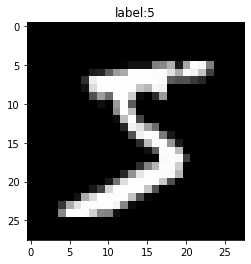

In [6]:
n = 0 # 表示するデータ番号を指定

import matplotlib.pyplot as plt
# 手書き文字を作図
plt.imshow(x_train[n].reshape((28, 28)), cmap='gray') # 手書き文字
plt.title('label:' + str(t_train[n])) # ラベル
plt.show()

In [7]:
# MNIST画像の表示(p74)
# 画像の表示にはPIL(Python Image Library)モジュールを使用する

import sys, os
sys.path.append('../source_code') # importの検索対象ファイルにsource_codeを追加
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False) # MNISTデータの読み込み

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) # 形状を元の画像サイズに変形
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


#### 3.6.2 ニューラルネットワークの推論処理

入力層784個，出力層10個，隠れ層は2つあり，一つ目は50個，2つ目は100個のニューロンを持つ．

In [10]:
# 3層ニューラルネットワークの実装

import numpy as np
import pickle # これを忘れてて一瞬詰まった．

# sigmoid関数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# softmax関数
def softmax(a):

    c = np.max(a)  # オーバーフローを考慮
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False) # normalize: 入力画像を正規化するか，flatten: 1次元配列にするか，one_hot_label: ちょっとよくわからない
    return x_test, t_test

# pickleファイルのsample_weight.pklに保存された学習済みの重みパラメータを読み込む
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

# 残り2つの関数はこれまでやってきた関数と同様
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

これら3つの関数を使って，ニューラルネットワークによる推論処理を行う．
認識精度（どれだけ正しく分類できるか）を評価する

In [14]:
# この中で何が起こっているのかよくわかってない．

# データを取得
x, t = get_data()
# pickleファイルのsample_weight.pklに保存された学習済みの重みパラメータを読み込む．
network = init_network()
# print(len(x))

# 認識精度の評価？
accuracy_cnt = 0
for i in range(len(x)):
    # trainデータそれぞれに対して，3層ニューラルネットワークを適用
    y = predict(network, x[i])
    # 最も確率の高い要素のインデックスを取得
    p = np.argmax(y)
    
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

### 3.6.3 バッチ処理
MNISTデータセットを扱ったニューラルネットワークの実装は以上になるが，ここでは，入力データと重みパラメータの”形状”に注意して，先ほどの実装を再度見ていく．

それでは，先のニューラルネットワークの各層の重みの形状を出力してみる．

In [15]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [16]:
# バッチ処理による実装

# 3層ニューラルネットワークの関数を使う
x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

# 100スパンでlen(x)まで繰り返す
for i in range(0, len(x), batch_size):
    # 先頭から100枚ずつバッチとして取り出す
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    # 最大値のインデックスを取得．axis=1という引数で100*10の配列の中で1次元目の要素ごとに最大値のインデックスを見つけることを指定してる
    p = np.argmax(y_batch, axis=1)
    # 最後にバッチ単位で分類した結果と，実際の答えを比較するために，ブーリアン配列を作成し，Trueの個数を算出する
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

# バッチ処理を行うことで，拘束に効率よく処理することができた．この処理は次章でも使う．

Accuracy: 0.9352


### 3.7 まとめ
本章では，ニューラルネットワークの準方向の伝播（forward propagation）について解説した．

本章で説明したニューラルネットワークは，前章のパーセプトロンと，ニューロンの信号が階層的に伝わるという点で同じだった．

しかし，次のニューロンへ信号を送信する際に，信号を変化させる活性化関数に大きな違いがある．

ニューラルネットワークでは活性化関数が滑らかに変化するシグモイド関数，パーセプトロンでは信号が急に変化するステップ関数を使用した．」

この違いがニューラルネットワークの学習において重要になってくる．


ー－－－－－－－－－－－－－－－－－－－－－－－－－－－－
* ニューラルネットワークでは，活性化関数としてシグモイド関数や，ReLU関数のような滑らかに変化する関数を利用する
* Numpyの多次元配列をうまく使うことで，ニューラルネットワークを効率よく実装することができる．
* 機械学習の問題は，回帰問題と分類問題に大別できる．
* 出力層で使用する活性化関数は，回帰問題では恒等関数，分類問題ではソフトマックス関数を一般的に利用する．
* 分類問題では，出力層のニューロンの数を分類するクラス数に設定する．
* 入力データのまとまりをバッチと言い，バッチ単位で推論処理を行うことで，計算を高速に行うことができる．